In [34]:
%matplotlib inline
%run ./lorenz_system.py
import math

In [2]:
stepCnt = 1000
dt = .01

In [3]:
xs,ys,zs = build_system(stepCnt,dt)

# Lorenz System

![equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/5f993e17e16f1c3ea4ad7031353c61164a226bb8)

# Baseline Plots

## 3d Plot

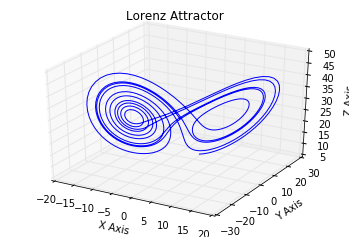

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

My own stuff is below.

## 2d Plots

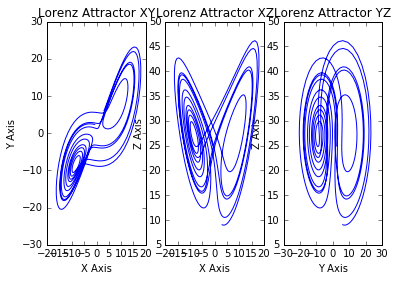

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(xs, ys)
ax1.set_xlabel("X Axis")
ax1.set_ylabel("Y Axis")
ax1.set_title("Lorenz Attractor XY")

ax2.plot(xs, zs)
ax2.set_xlabel("X Axis")
ax2.set_ylabel("Z Axis")
ax2.set_title("Lorenz Attractor XZ")

ax3.plot(ys, zs)
ax3.set_xlabel("Y Axis")
ax3.set_ylabel("Z Axis")
ax3.set_title("Lorenz Attractor YZ")

# Wind Direction

In [18]:
def get_wind_angle(p1, p2):
    ''' 
    return slope between the two points
    '''
    # get slope
    slope = (p2[len(p2) - 1] - p2[0]) / (p1[len(p1) - 1] - p1[0])

    # get direction of line
    # 1  = up
    # -1 = down
    direction = 1 
    
    if p2[0] < p2[len(p2) - 1]:
        direction = -1
    elif p2[0] > p2[len(p2) - 1]:
        direction = 1
    else:
        direction = 0
    
    # initialize theta
    theta = 0
    
    if direction == 0:
        # this is a straight line
        theta = 0 if p1[0] < p1[len(p1) - 1] else 180
    elif p2[len(p2) - 1] == p2[0]:
        theta = 90 if direction == 1 else 270
    else:
        # get angle in  degrees, atan(y / x)
        theta = math.degrees(math.atan2(slope, 1))

        # get angle relative to whole graph
        if theta < 0 and direction == 1:
            theta = (theta * -1) + 90
        elif theta < 0 and direction == -1:
            theta = (theta * -1) + 180
        elif theta >= 0 and direction == -1:
            theta += 270
    
    return math.radians(theta)

In [19]:
iterator = 10

x      = []
y      = []
angles = []

for minimum in range(0, len(xs) - iterator, iterator):
    maximum = minimum + iterator
    
    # store info
    x.append(ys[minimum])
    y.append(zs[minimum])
    angles.append(get_wind_angle(ys[minimum:maximum], zs[minimum:maximum]))

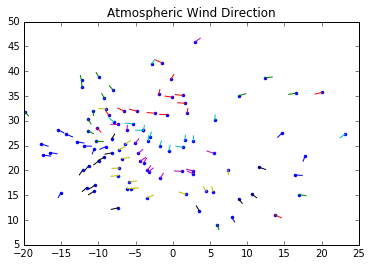

In [27]:
line = plt.figure()

plt.plot(x, y, ".")

for i in range(len(angles)):
    angle = angles[i]
    x_cor = x[i]
    y_cor = y[i]
    
    plt.plot([x_cor, x_cor + math.cos(angle)], [y_cor, y_cor + math.sin(angle)])

plt.title("Atmospheric Wind Direction")

# Lorenz Attractor Centers

## Derivation

![equation](http://www.sciweavers.org/tex2img.php?eq=Q%20%3D%20%28%5Cpm%20%5Csqrt%7Bb%28r-1%29%7D%2C%5Cpm%20%5Csqrt%7Bb%28r-1%29%7D%2C%20r-1%20%29&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0)

## Two Centers

In [9]:
x = math.sqrt(const_b*(const_r - 1))
y = math.sqrt(const_b*(const_r - 1))
z = const_r - 1

y_center = (y, -y)
z_center = (z,z)

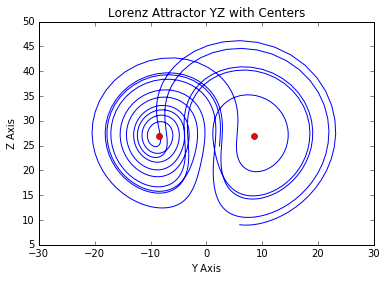

In [10]:
fig = plt.figure()
ax = fig.gca()

ax.plot(ys, zs)
ax.plot(y_center,z_center,'ro')
ax.set_xlabel("Y Axis")
ax.set_ylabel("Z Axis")
ax.set_title("Lorenz Attractor YZ with Centers")

plt.show()

## One Center

In [11]:
one_x,one_y,one_z = build_system(stepCnt,dt,s=2)

x = math.sqrt(const_b*(const_r - 1))
y = math.sqrt(const_b*(const_r - 1))
z = const_r - 1

y_center = y
z_center = z

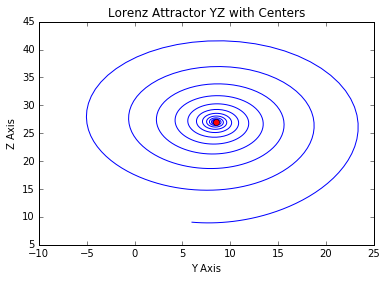

In [15]:
fig = plt.figure()
ax = fig.gca()

ax.plot(one_y, one_z)
ax.plot(y_center,z_center,'ro')
ax.set_xlabel("Y Axis")
ax.set_ylabel("Z Axis")
ax.set_title("Lorenz Attractor YZ with Centers")

plt.show()

## Results

One center requires use of positive y and z.

Two centers requires use of both positive and negative y and positive z to match both.

# Pressure

In [13]:
sea_level_pressure_max = 1085
sea_level_pressure_min = 870

In [35]:
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [40]:
def cluster_low_hi_points(x_axis, y_axis, center_one, center_two):
    one_points  = []
    two_points = []
    
    for i in range(len(x_axis)):
        point = (x_axis[i], y_axis[i])
        cent_one_dist = dist(point, center_one)
        cent_two_dist = dist(point, cneter_two)
        
        if center_one_dist < cent_two_dist:
            point = {
                'coord': point,
                'dist': cent_one_dist
            }
            one_points.append(point)
        else:
            point = {
                'coord': point,
                'dist': cent_two_dist
            }
            two_points.append(point)
    
    return low_points, high_points

## Two Center

In [43]:
xs,ys,zs = build_system(stepCnt,dt)
# cluster_low_hi_points(x,y,)

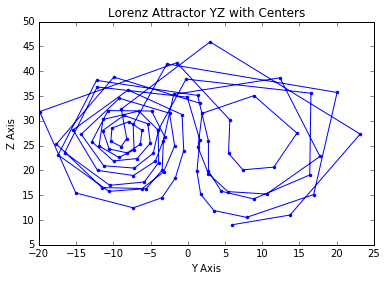

In [41]:
fig = plt.figure()
ax = fig.gca()

ax.plot(x, y,'.-')
ax.set_xlabel("Y Axis")
ax.set_ylabel("Z Axis")
ax.set_title("Lorenz Attractor YZ with Centers")

plt.show()

## Two Centers